### Notebook Creator -> RUPESH MAHANTY
#### [Dataset Link](https://www.kaggle.com/competitions/playground-series-s4e1/data) |||||| [Notebook_URL](https://www.kaggle.com/code/rupeshmahanty/bank-churn)
#### Connect Via :
* [Linkedin](https://www.linkedin.com/in/rupesh-mahanty-66a21a191/)   
* [Git-hub](https://github.com/RUP3506)


##### About the Tabular Playground Series
The goal of the Tabular Playground Series is to provide the Kaggle community with a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science. 

In [1]:
# importing the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing the data 
dataset = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
submission_data = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

In [3]:
# now we will see submission data structure
submission_data.head(2)

,id,Exited
0,165034,0.5
1,165035,0.5


In [4]:
dataset.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
print(f'Columns in Data Table --- \n {dataset.columns}')
print(f'\nNo of columns = {dataset.shape[1]}')

Columns in Data Table --- 
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

No of columns = 14


In [6]:
# Now we will check if there is any null values or not. 
# Sum of null values in each columns
for i in dataset.columns:
    print(f'{i} -> {dataset[i].isna().sum()}')

id -> 0
CustomerId -> 0
Surname -> 0
CreditScore -> 0
Geography -> 0
Gender -> 0
Age -> 0
Tenure -> 0
Balance -> 0
NumOfProducts -> 0
HasCrCard -> 0
IsActiveMember -> 0
EstimatedSalary -> 0
Exited -> 0


So, There is not any null values . 

In [7]:
# checking Duplicate rows 
print('Number of duplicate rows ',end=' ')
print(dataset.duplicated().sum())

Number of duplicate rows  0


Okay ! So the dataset looks fine , now we will check the data types of the columns.

In [8]:
# we dont need first 3 columns :
data = dataset.iloc[:,3:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [9]:
for i in data.columns:
    if data[i].dtype == 'O':
        # printing the class name with unique classes
        print(f'Unique Classes In -: {data[i].value_counts()} \n')
        print(f'Number of unique classes {len(data[i].unique())}')
        print('::'*30)

Unique Classes In -: Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64 

Number of unique classes 3
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Unique Classes In -: Gender
Male      93150
Female    71884
Name: count, dtype: int64 

Number of unique classes 2
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


In [10]:
# We have two classes in gender : male and female

def gender(x):
    if isinstance(x, int):
        return x
    if x == 'Female':
        return 0
    elif x == 'Male':
        return 1
    else : 
        return x
# we have 3 geographic locations
def geography(x):
    if isinstance(x, int):
        return x
    if x == 'France':
        return 0
    elif x == 'Spain':
        return 1
    elif x == 'Germany':
        return 2
    else :
        return x
    
data['Gender'] = data.Gender.apply(lambda x:gender(x))
data['Geography'] = data.Geography.apply(lambda x:geography(x))

Age Distribution :
 (32.8, 40.2]                  69108
(25.4, 32.8]                  36582
(40.2, 47.6]                  30665
(47.6, 55.0]                  13209
(17.924999999999997, 25.4]     7093
(55.0, 62.4]                   5580
(62.4, 69.8]                   1975
(69.8, 77.2]                    736
(77.2, 84.6]                     72
(84.6, 92.0]                     14
Name: count, dtype: int64



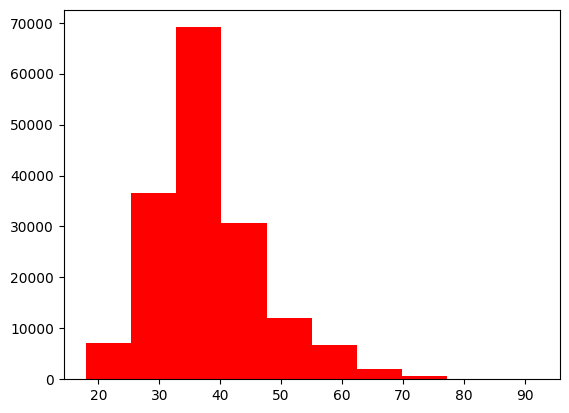

In [11]:
print(f'Age Distribution :\n {data.Age.value_counts(bins=10)}\n')
plt.hist(data.Age,bins=10,color='red')
plt.show()

In [12]:
# Now we will try to find the correlation 
# we dont need id,surname,customerid 
# train_data = data.iloc[:,3:]

def correlation(x,threshold=0.2):
    # we are not taking the id, customerid and surname column
    corr = x.corr()
    pos = corr[corr['Exited'] > threshold].T.columns[:-1]
    neg = corr[corr['Exited'] < -1*threshold].T.columns
    l = []
    try :
        if pos is not None:
            for i in pos:
                l.append(i)
    except :
        print()
    try :
        if pos is not None:
            for i in neg:
                l.append(i)
    except :
        print()
    if len(l) == 0:
        return 'Change the threshold value'
    else :
        print(f'Number of Features -> {len(l)}')
        return x[l]
    
def split_data(x, y,test_size):
    x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = test_size, random_state=23)
    return x_train,x_test,y_train,y_test

    
def model_building(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    print(classification_report(predict,y_test))
    print(f'ROC_AUC Score: {roc_auc_score(predict,y_test)}')
    
# In python first we define the non default arguments
def prediction(x, model, test_size, threshold=0.2):
    model_name = str(model)[:-2]
    y = x.iloc[:, -1]
    x = correlation(x, threshold=threshold)
    x_train, x_test, y_train, y_test = split_data(x, y, test_size)
    print(f'Model name -> {model_name}')
    model_name = model_building(model, x_train, y_train, x_test, y_test)


In [13]:
# Importing the different models from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

### 1. First we will do the prediction using the normal dataset.

In [14]:
prediction(data, GaussianNB(),0.2,0)
prediction(data, AdaBoostClassifier(),0.2,0)
prediction(data, GradientBoostingClassifier(),0.2,0)
prediction(data, DecisionTreeClassifier(),0.2,0)
prediction(data, KNeighborsClassifier(),0.2,0)
prediction(data, LogisticRegression(),0.2,0)
prediction(data, RandomForestClassifier(),0.2,0)

Number of Features -> 10
Model name -> GaussianNB
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     30475
           1       0.19      0.53      0.28      2532

    accuracy                           0.79     33007
   macro avg       0.57      0.67      0.58     33007
weighted avg       0.90      0.79      0.83     33007

ROC_AUC Score: 0.6725738342489311
Number of Features -> 10
Model name -> AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     27972
           1       0.53      0.74      0.62      5035

    accuracy                           0.86     33007
   macro avg       0.74      0.81      0.77     33007
weighted avg       0.89      0.86      0.87     33007

ROC_AUC Score: 0.8130958593719269
Number of Features -> 10
Model name -> GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     2

#### From the above outputs we can say that there is a huge difference in f1-score ,

reasons may be :
* Imbalanced data , So we will oversample the minor class

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(data.iloc[:,3:-1], data.iloc[:,-1])
resampled_data = pd.concat([x_resampled,y_resampled],axis=1)

In [16]:
x_resampled.shape , y_resampled.shape

((260226, 7), (260226,))

In [17]:
prediction(resampled_data, GaussianNB(),0.2,0)
prediction(resampled_data, AdaBoostClassifier(),0.2,0)
prediction(resampled_data, GradientBoostingClassifier(),0.2,0)
prediction(resampled_data, DecisionTreeClassifier(),0.2,0)
prediction(resampled_data, KNeighborsClassifier(),0.2,0)
prediction(resampled_data, LogisticRegression(),0.2,0)
prediction(resampled_data, RandomForestClassifier(),0.2,0)

Number of Features -> 7
Model name -> GaussianNB
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     26214
           1       0.73      0.73      0.73     25832

    accuracy                           0.73     52046
   macro avg       0.73      0.73      0.73     52046
weighted avg       0.73      0.73      0.73     52046

ROC_AUC Score: 0.7344424401127694
Number of Features -> 7
Model name -> AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     26088
           1       0.86      0.86      0.86     25958

    accuracy                           0.86     52046
   macro avg       0.86      0.86      0.86     52046
weighted avg       0.86      0.86      0.86     52046

ROC_AUC Score: 0.8602548176625469
Number of Features -> 7
Model name -> GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     2670

In [18]:
# we can also do scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_resampled = correlation(resampled_data,0)
# Now we scale the data using standard scaler

x_train, x_test, y_train, y_test = split_data(x_resampled, y_resampled, test_size=0.2)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


model_name = model_building(RandomForestClassifier(), x_train_scaled, y_train, x_test_scaled, y_test)

Number of Features -> 7
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     27285
           1       0.86      0.90      0.88     24761

    accuracy                           0.89     52046
   macro avg       0.89      0.89      0.89     52046
weighted avg       0.89      0.89      0.89     52046

ROC_AUC Score: 0.8859377740256779


### Observations:
* Over-sampled data and the Scaled data both are performing same 
* Val_accuracy 88%

In [19]:
# Random Forest Is giving the best performance
# Now we will train the final train data for the prediction
x_train = correlation(resampled_data,0)
y_train = y_resampled.iloc[:]

model = RandomForestClassifier()
model.fit(x_train,y_train)

predict = model.predict_proba(test_data[x_train.columns])

Number of Features -> 7


In [20]:
output = pd.DataFrame(predict,columns=['Not_Exited','Exited'])
output.head(3)

,Not_Exited,Exited
0,1.00,0.00
1,0.01,0.99
2,1.00,0.00


In [21]:
submission = pd.concat([test_data.id,output.Exited],axis=1)
submission.to_csv('submission.csv',index=False)

In [22]:
submission_data.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [23]:
prediction(resampled_data, RandomForestClassifier(),0.2,0)

Number of Features -> 7
Model name -> RandomForestClassifier
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     27278
           1       0.86      0.90      0.88     24768

    accuracy                           0.89     52046
   macro avg       0.88      0.89      0.89     52046
weighted avg       0.89      0.89      0.89     52046

ROC_AUC Score: 0.885870545055949
